# Activity 12.01 - Understanding power usage

In this activity, as a data analyst involved in an energy conservation study, you are provided with data collected from a home in France over several years, which includes frequent measurements of total power usage as well as submeters that isolate the kitchen, laundry room, and some heating and air conditioning use. You have been asked to look at kitchen energy use and understand the time of day trends.

1. For this activity, all you will need is the pandas and numpy libraries. Load them in the first cell of the notebook:

In [1]:
import pandas as pd
import numpy as np

2. Read in the household_power_consumption.csv data from the Datasets directory, and list the first few rows.

In [2]:
df=pd.read_csv('Chapter12-Datasets/household_power_consumption.csv',sep=';',low_memory=False)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/8/2008,00:00:00,0.500,0.226,239.750,2.400,0.000,0.000,1.0
1,1/8/2008,00:01:00,0.482,0.224,240.340,2.200,0.000,0.000,1.0
2,1/8/2008,00:02:00,0.502,0.234,241.680,2.400,0.000,0.000,0.0
3,1/8/2008,00:03:00,0.556,0.228,241.750,2.600,0.000,0.000,1.0
4,1/8/2008,00:04:00,0.854,0.342,241.550,4.000,0.000,1.000,7.0


3. You should inspect the data types of the columns, and the further investigate whether there are non-numeric values. If so, correct them by converting to NA values and then filling them by interpolation.

In [3]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

4. Make a quick visualization to understand the timeframe of the data. Your plan is to identify a year with complete data and focus on that:

In [4]:
for col in df.columns:
    print('information for column '+
         col +
          ':\n',
          df[col].describe()
         )

information for column Date:
 count      1049760
unique         729
top       1/8/2008
freq          1440
Name: Date, dtype: object
information for column Time:
 count      1049760
unique        1440
top       00:00:00
freq           729
Name: Time, dtype: object
information for column Global_active_power:
 count     1049760
unique       3852
top             ?
freq         9570
Name: Global_active_power, dtype: object
information for column Global_reactive_power:
 count     1049760
unique        510
top         0.000
freq       230359
Name: Global_reactive_power, dtype: object
information for column Voltage:
 count     1049760
unique       2738
top             ?
freq         9570
Name: Voltage, dtype: object
information for column Global_intensity:
 count     1049760
unique        207
top         1.400
freq        81879
Name: Global_intensity, dtype: object
information for column Sub_metering_1:
 count     1049760
unique         89
top         0.000
freq       955562
Name: Sub_metering

5. Using the year you identified, create a new DataFrame having Date, Time and Kitchen_power_use. Not that Sub_metering_1 is the kitchen:

In [5]:
df.replace('?',np.nan, inplace=True)
df.interpolate(inplace=True)
for col in df.columns[2:]:
    df[col]=df[col].astype(float)

In [6]:
df.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

6. Date and Time are substrings; combine them on each row, then convert the combined string to a datetime, and store that in a new column called timestamp. Keep in mind the European format of the original date strings.

<AxesSubplot:xlabel='Date'>

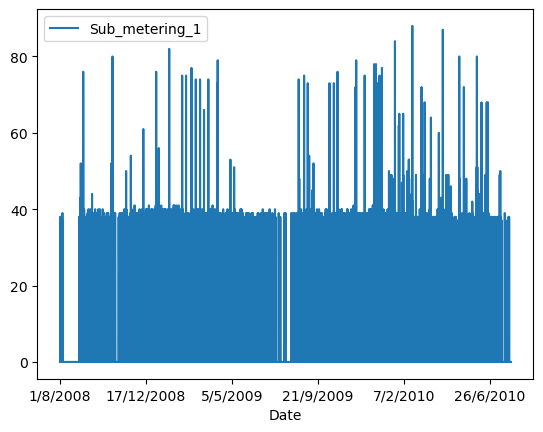

In [7]:
(df[['Date','Sub_metering_1']].plot(x='Date', y='Sub_metering_1'))

7. Create an hour and date column using methods on the timestamp column to represent the hour of the day and the date in a standard format:

In [8]:
kitchen=df[['Date','Time','Sub_metering_1']]
kitchen = kitchen.loc[kitchen['Date'].str.contains('2009'),:]
kitchen.columns=['Date','Time','Kitchen_power_use']
kitchen.head()

,Date,Time,Kitchen_power_use
220320,1/1/2009,00:00:00,0.0
220321,1/1/2009,00:01:00,0.0
220322,1/1/2009,00:02:00,0.0
220323,1/1/2009,00:03:00,0.0
220324,1/1/2009,00:04:00,0.0


In [9]:
kitchen.loc[:, 'timestamp'] = pd.to_datetime(kitchen.loc[:,'Date']+' '+kitchen.loc[:,'Time'],dayfirst=True)
kitchen.sort_values('timestamp', inplace=True);
kitchen.head() 

,Date,Time,Kitchen_power_use,timestamp
220320,1/1/2009,00:00:00,0.0,2009-01-01 00:00:00
220321,1/1/2009,00:01:00,0.0,2009-01-01 00:01:00
220322,1/1/2009,00:02:00,0.0,2009-01-01 00:02:00
220323,1/1/2009,00:03:00,0.0,2009-01-01 00:03:00
220324,1/1/2009,00:04:00,0.0,2009-01-01 00:04:00


In [10]:
kitchen['hour']=kitchen['timestamp'].dt.hour
kitchen['date']=kitchen['timestamp'].dt.date
kitchen

,Date,Time,Kitchen_power_use,timestamp,hour,date
220320,1/1/2009,00:00:00,0.0,2009-01-01 00:00:00,0,2009-01-01
220321,1/1/2009,00:01:00,0.0,2009-01-01 00:01:00,0,2009-01-01
220322,1/1/2009,00:02:00,0.0,2009-01-01 00:02:00,0,2009-01-01
220323,1/1/2009,00:03:00,0.0,2009-01-01 00:03:00,0,2009-01-01
220324,1/1/2009,00:04:00,0.0,2009-01-01 00:04:00,0,2009-01-01
...,...,...,...,...,...,...
745915,31/12/2009,23:55:00,0.0,2009-12-31 23:55:00,23,2009-12-31
745916,31/12/2009,23:56:00,0.0,2009-12-31 23:56:00,23,2009-12-31
745917,31/12/2009,23:57:00,0.0,2009-12-31 23:57:00,23,2009-12-31
745918,31/12/2009,23:58:00,0.0,2009-12-31 23:58:00,23,2009-12-31


8. Group the data by date and hour aggregating Kitchen_power_use:

In [11]:
kitchen = (kitchen[['date','hour','Kitchen_power_use']].groupby(['date', 'hour']).sum())
kitchen.reset_index(inplace=True)
kitchen.iloc[20:28, :]

,date,hour,Kitchen_power_use
20,2009-01-01,20,0.0
21,2009-01-01,21,0.0
22,2009-01-01,22,0.0
23,2009-01-01,23,0.0
24,2009-01-02,0,0.0
25,2009-01-02,1,0.0
26,2009-01-02,2,0.0
27,2009-01-02,3,0.0


9. For January, aggregate the data by hour and make a bar plot by hour of kitchen energy use:

C:\Users\miran\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


<AxesSubplot:xlabel='hour'>

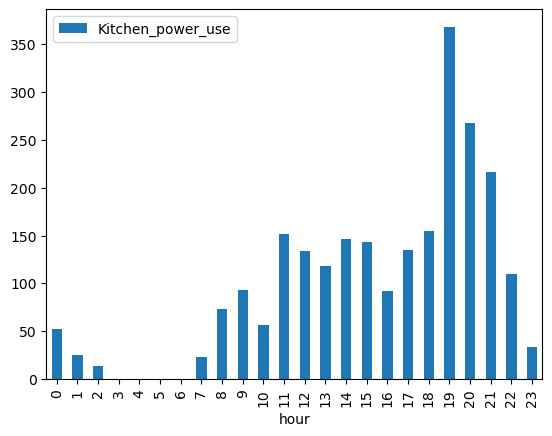

In [12]:
(kitchen.loc[((kitchen['date']>= pd.to_datetime('2009-01-01'))&(kitchen['date']<pd.to_datetime('2009-02-01'))),['hour','Kitchen_power_use']].groupby('hour').mean().plot(kind='bar'))

10. You see that usage seems to begin around breakfast time, continue through the day with a peak at dinner time, then trail off. Make a similar plot for the entire year to compare:

<AxesSubplot:xlabel='hour'>

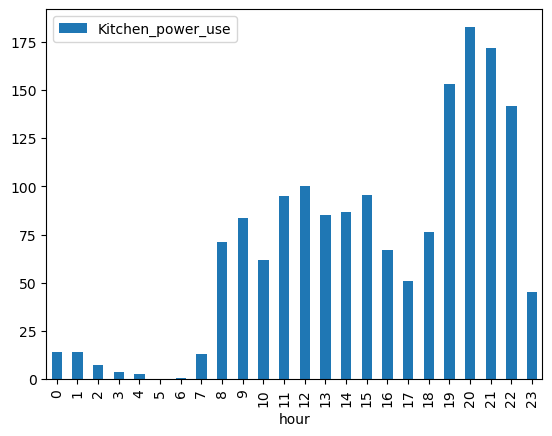

In [13]:
(kitchen.loc[:,['hour','Kitchen_power_use']].groupby('hour').mean().plot(kind='bar'))